In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_block_index(block_id):
    return int(block_id.split('_')[-1])
    
def create_latency_plots(df, window_size=20, marker_size=50, GTnumber=-1, source = ''):
    sns.set(font_scale=1.5)

    # Calculate the rolling average for each unique path (combination of Source and Destination)
    df['Path'] = df['Source'].astype(str) + ' -> ' + df['Destination'].astype(str)
    df['Latency_Rolling_Avg'] = df.groupby('Path')['Latency'].transform(lambda x: x.rolling(window=window_size).mean())
    
    # Metrics for x-axis
    # metrics = ['Arrival Time', 'Block Index', 'Creation Time']
    metrics = ['Arrival Time', 'Creation Time']

    # Create subplots
    fig, axes = plt.subplots(len(metrics), 2, figsize=(18, 18))
    
    for i, metric in enumerate(metrics):
        # Line Plots on the left (column index 0)
        sns.lineplot(x=metric, y='Latency_Rolling_Avg', hue='Path', ax=axes[i, 0], data=df, legend=False)
        axes[i, 0].set_title(f'Latency Trends Over {metric} (Window Size = {window_size})')
        axes[i, 0].set_xlabel(metric)
        axes[i, 0].set_ylabel('Latency (Rolling Average)')
        
        # Scatter Plots on the right (column index 1)
        sns.scatterplot(x=metric, y='Latency', hue='Path', ax=axes[i, 1], data=df, marker='o', s=marker_size, legend=False)
        axes[i, 1].set_title(f'Individual Latency Points Over {metric}')
        axes[i, 1].set_xlabel(metric)
        axes[i, 1].set_ylabel('Latency')
        
    # Adjust the layout
    plt.tight_layout()
    # plt.savefig(outputPath + '/pngAllLatencies/' + '{}_gateways_All_Latencies_subplots.png'.format(GTnumber), dpi = 300)
    plt.savefig(source + '.png', dpi = 300)
    plt.show()
    plt.close()
    sns.set(font_scale=1.0)


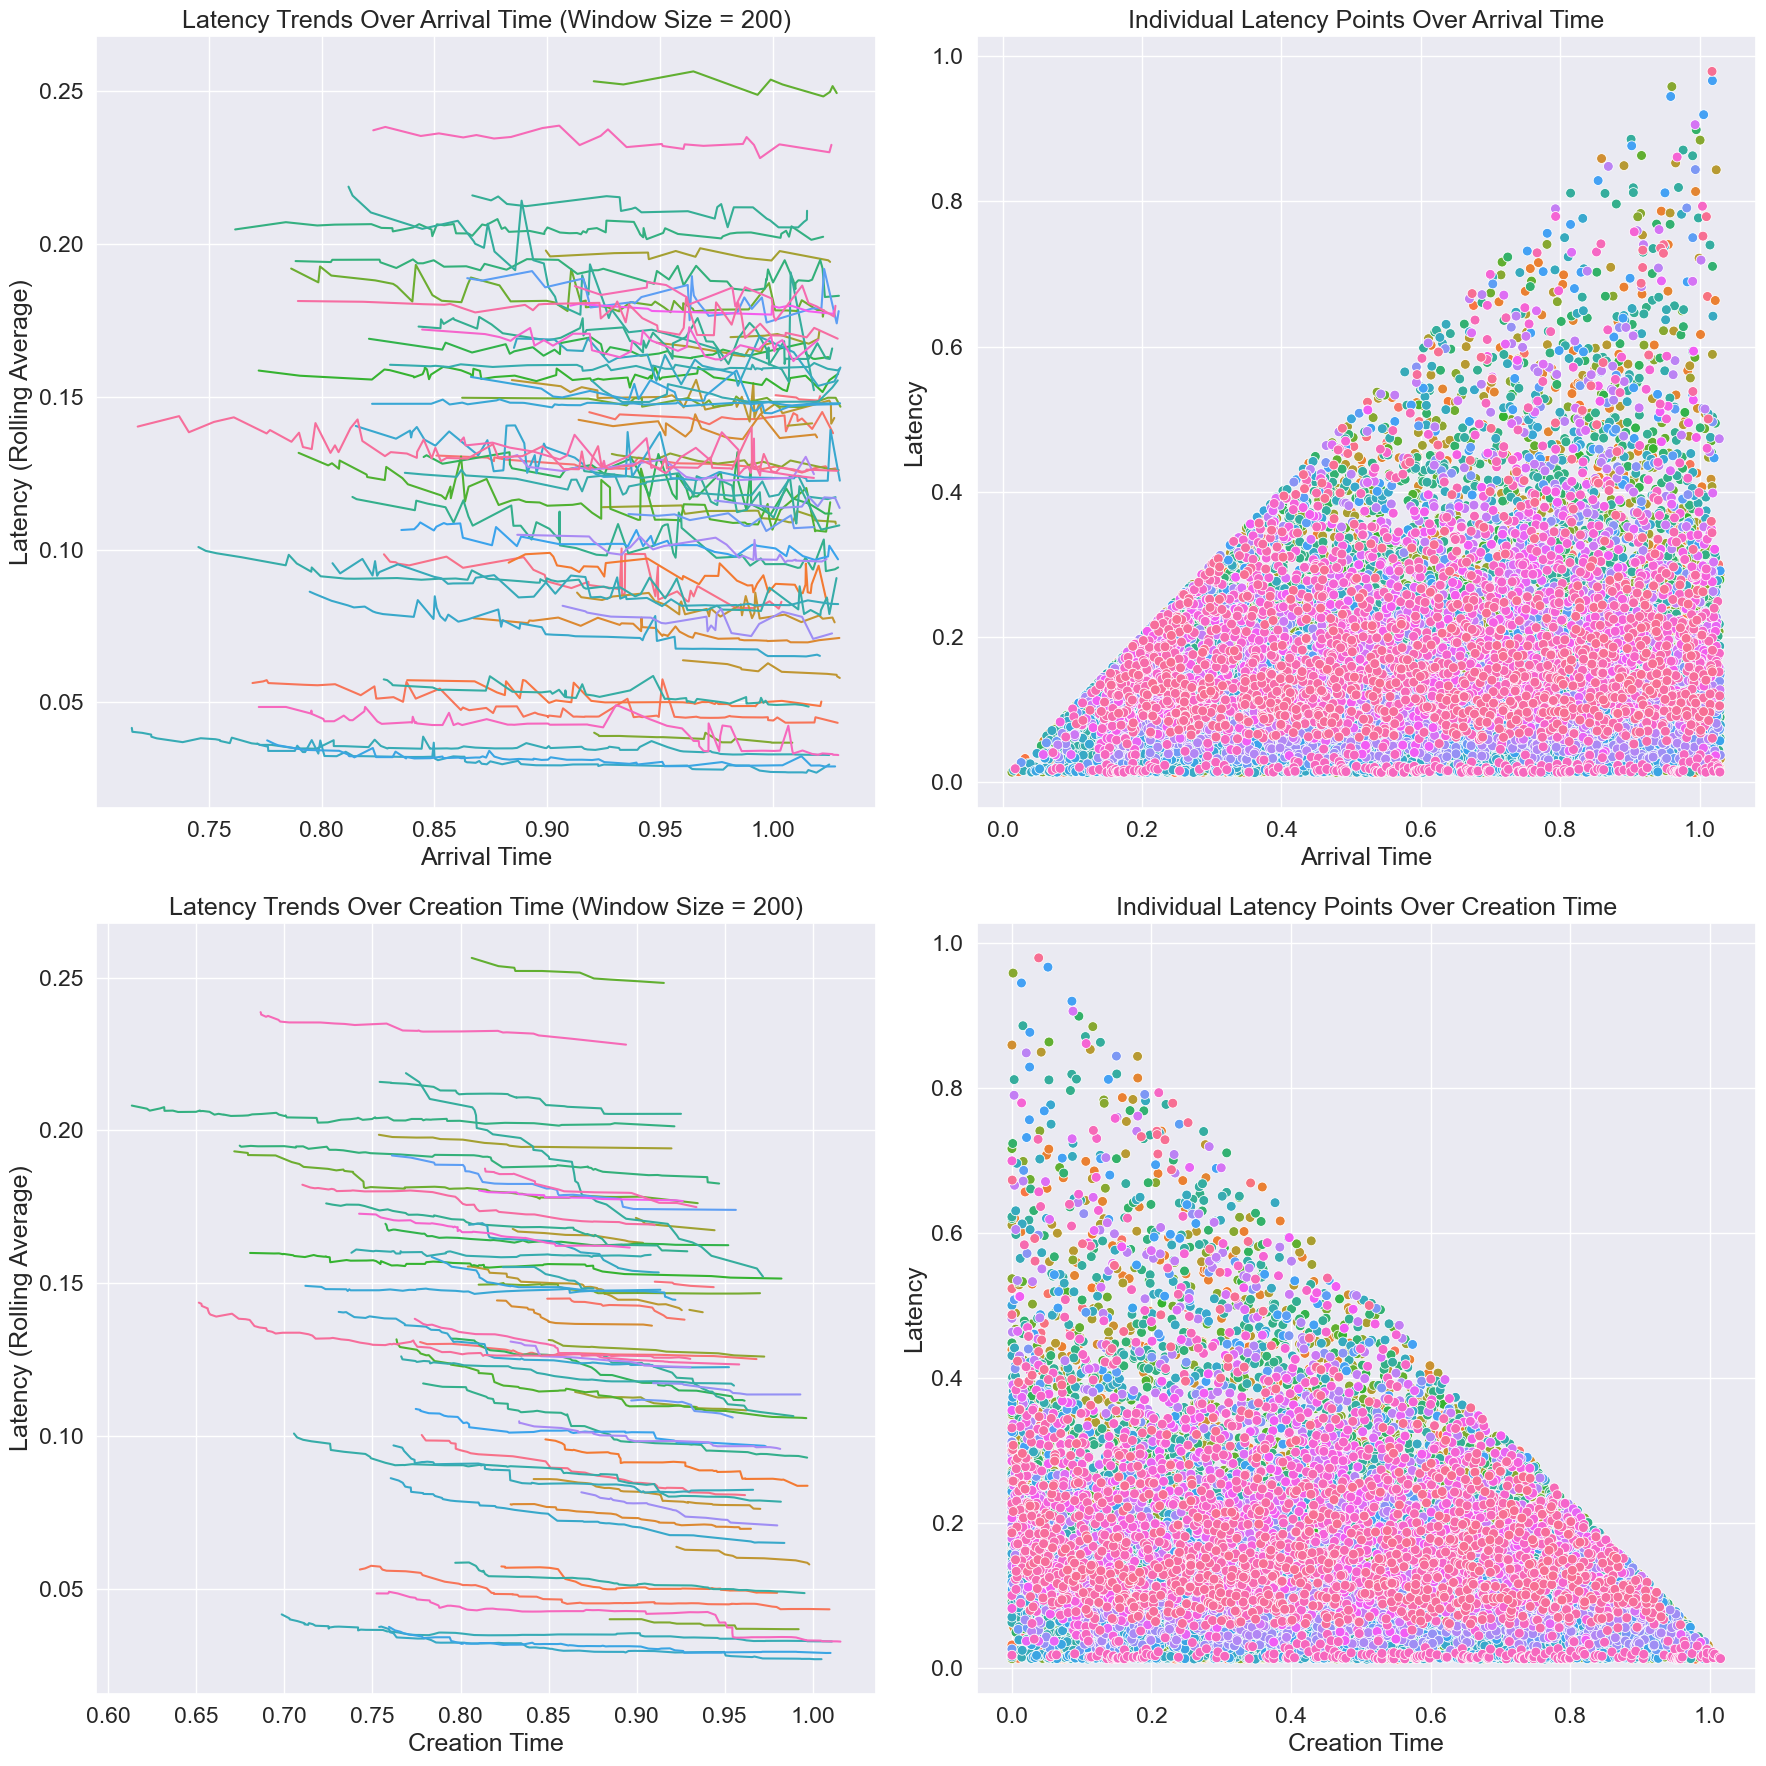

Unnamed: 0  Creation Time   Latency  Arrival Time  \
0            8009       0.000000  0.523365      0.523365   
1             671       0.009151  0.154432      0.163583   
2              32       0.012607  0.050083      0.062690   
3            1902       0.015010  0.212013      0.227023   
4             374       0.016273  0.126437      0.142710   
...           ...            ...       ...           ...   
19340       18478       0.814178  0.173706      0.987884   
19341       16778       0.820873  0.091466      0.912340   
19342       19092       0.862642  0.154597      1.017239   
19343       19116       0.866594  0.151566      1.018160   
19344       18854       0.908785  0.096726      1.005511   

                                     Source  \
0                          Aalborg, Denmark   
1                          Aalborg, Denmark   
2                          Aalborg, Denmark   
3                          Aalborg, Denmark   
4                          Aalborg, Denmark   
...                                     ...   
19340  Tolhuin, Argentina (partner station)   
19341  Tolhuin, Argentina (partner station)   
19342  Tolhuin, Argentina (partner station)   
19343  Tolhuin, Argentina (partner station)   
19344  Tolhuin, Argentina (partner station)   

                              Destination Block ID  Block Index  
0      Bangalore, India (partner station)    2_8_0            0  
1      Bangalore, India (partner station)    2_8_1            1  
2      Bangalore, India (partner station)    2_8_2            2  
3      Bangalore, India (partner station)    2_8_3            3  
4      Bangalore, India (partner station)    2_8_4            4  
...                                   ...      ...          ...  
19340                        Tokyo, Japan  4_9_187          187  
19341                        Tokyo, Japan  4_9_188          188  
19342                        Tokyo, Japan  4_9_197          197  
19343                        Tokyo, Japan  4_9_198          198  
19344                        Tokyo, Japan  4_9_207          207  

[19345 rows x 8 columns]

In [7]:
# Read the newly uploaded CSV file into a raw DataFrame
source = './allLatencies_10_gateways2'
df_raw = pd.read_csv(source + '.csv')

# remove aalborg
# df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the data block index from the Block ID in the raw DataFrame
df_raw['Block Index'] = df_raw['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200, source=source)

df_raw


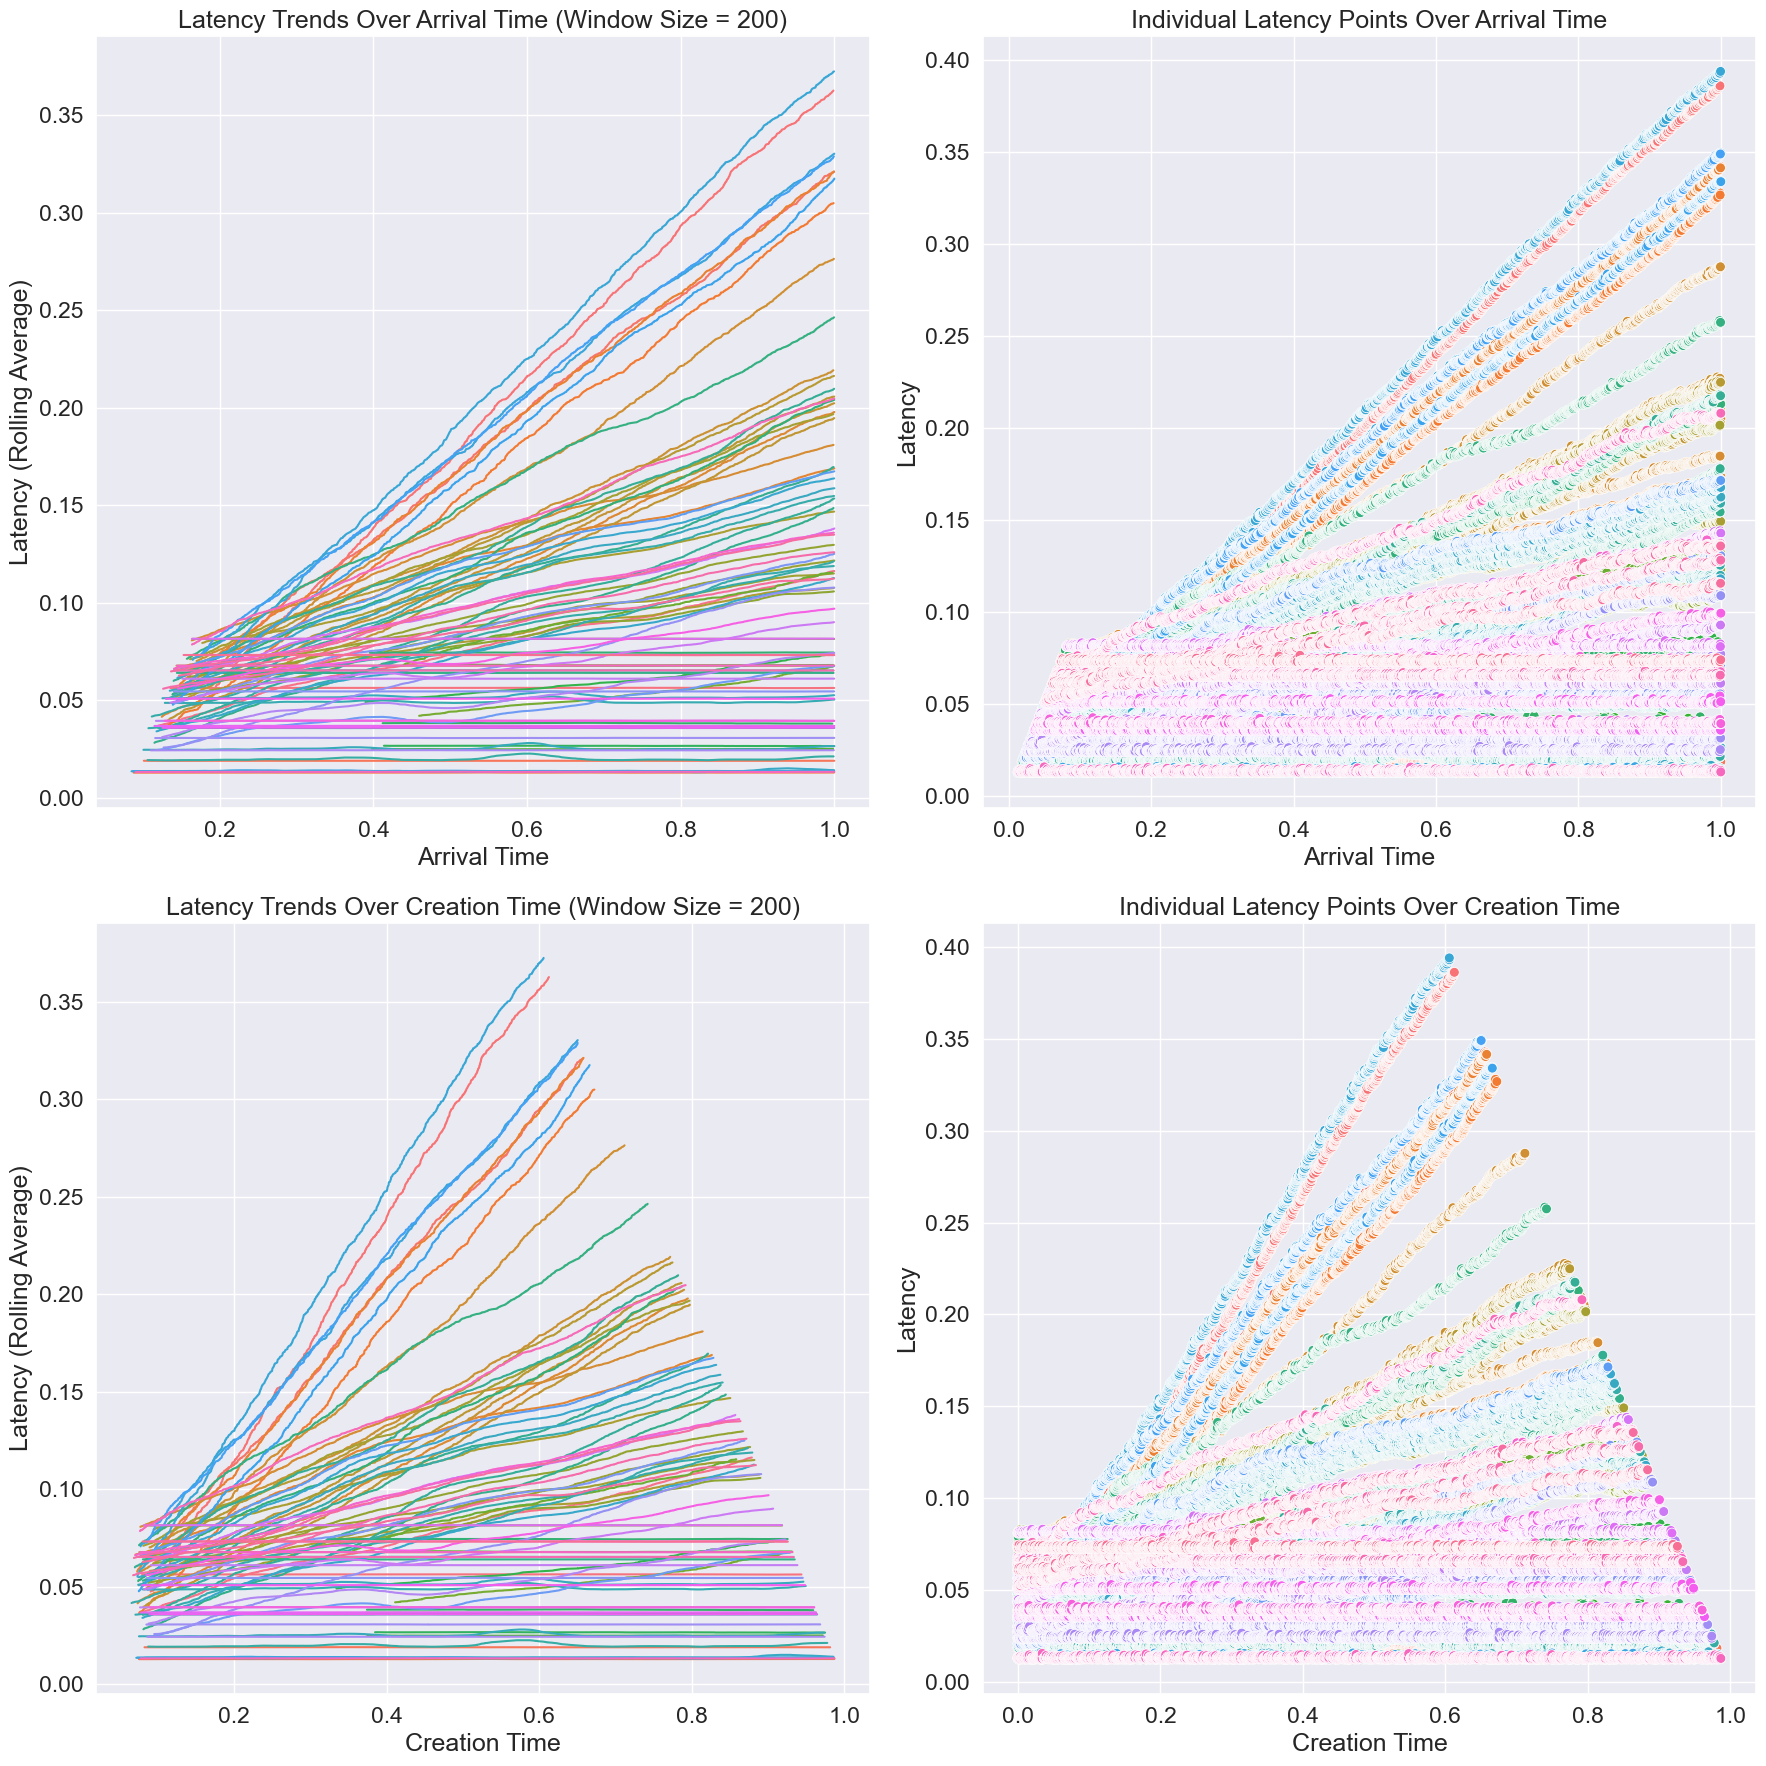

Unnamed: 0  Creation Time   Latency  Arrival Time  \
0              618       0.000000  0.033885      0.033885   
1              635       0.000915  0.033192      0.034107   
2              638       0.001124  0.033056      0.034180   
3              673       0.001172  0.033746      0.034918   
4              686       0.001948  0.033212      0.035160   
...            ...            ...       ...           ...   
177716      177396       0.925250  0.073028      0.998278   
177717      177467       0.925516  0.073116      0.998632   
177718      177477       0.925815  0.072880      0.998695   
177719      177494       0.925830  0.072944      0.998774   
177720      177701       0.925922  0.073945      0.999867   

                                      Source  \
0                           Aalborg, Denmark   
1                           Aalborg, Denmark   
2                           Aalborg, Denmark   
3                           Aalborg, Denmark   
4                           Aalborg, Denmark   
...                                      ...   
177716  Tolhuin, Argentina (partner station)   
177717  Tolhuin, Argentina (partner station)   
177718  Tolhuin, Argentina (partner station)   
177719  Tolhuin, Argentina (partner station)   
177720  Tolhuin, Argentina (partner station)   

                               Destination  Block ID  Block Index  
0       Bangalore, India (partner station)     2_8_0            0  
1       Bangalore, India (partner station)     2_8_1            1  
2       Bangalore, India (partner station)     2_8_2            2  
3       Bangalore, India (partner station)     2_8_3            3  
4       Bangalore, India (partner station)     2_8_4            4  
...                                    ...       ...          ...  
177716                        Tokyo, Japan  4_9_2538         2538  
177717                        Tokyo, Japan  4_9_2539         2539  
177718                        Tokyo, Japan  4_9_2540         2540  
177719                        Tokyo, Japan  4_9_2541         2541  
177720                        Tokyo, Japan  4_9_2542         2542  

[177721 rows x 8 columns]

In [8]:
# Read the newly uploaded CSV file into a raw DataFrame
source  = './allLatencies_10_gatewaysSR'
df_raw2 = pd.read_csv(source + '.csv')

# remove aalborg
# df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the data block index from the Block ID in the raw DataFrame
df_raw2['Block Index'] = df_raw2['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw2.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200, source=source)

df_raw2

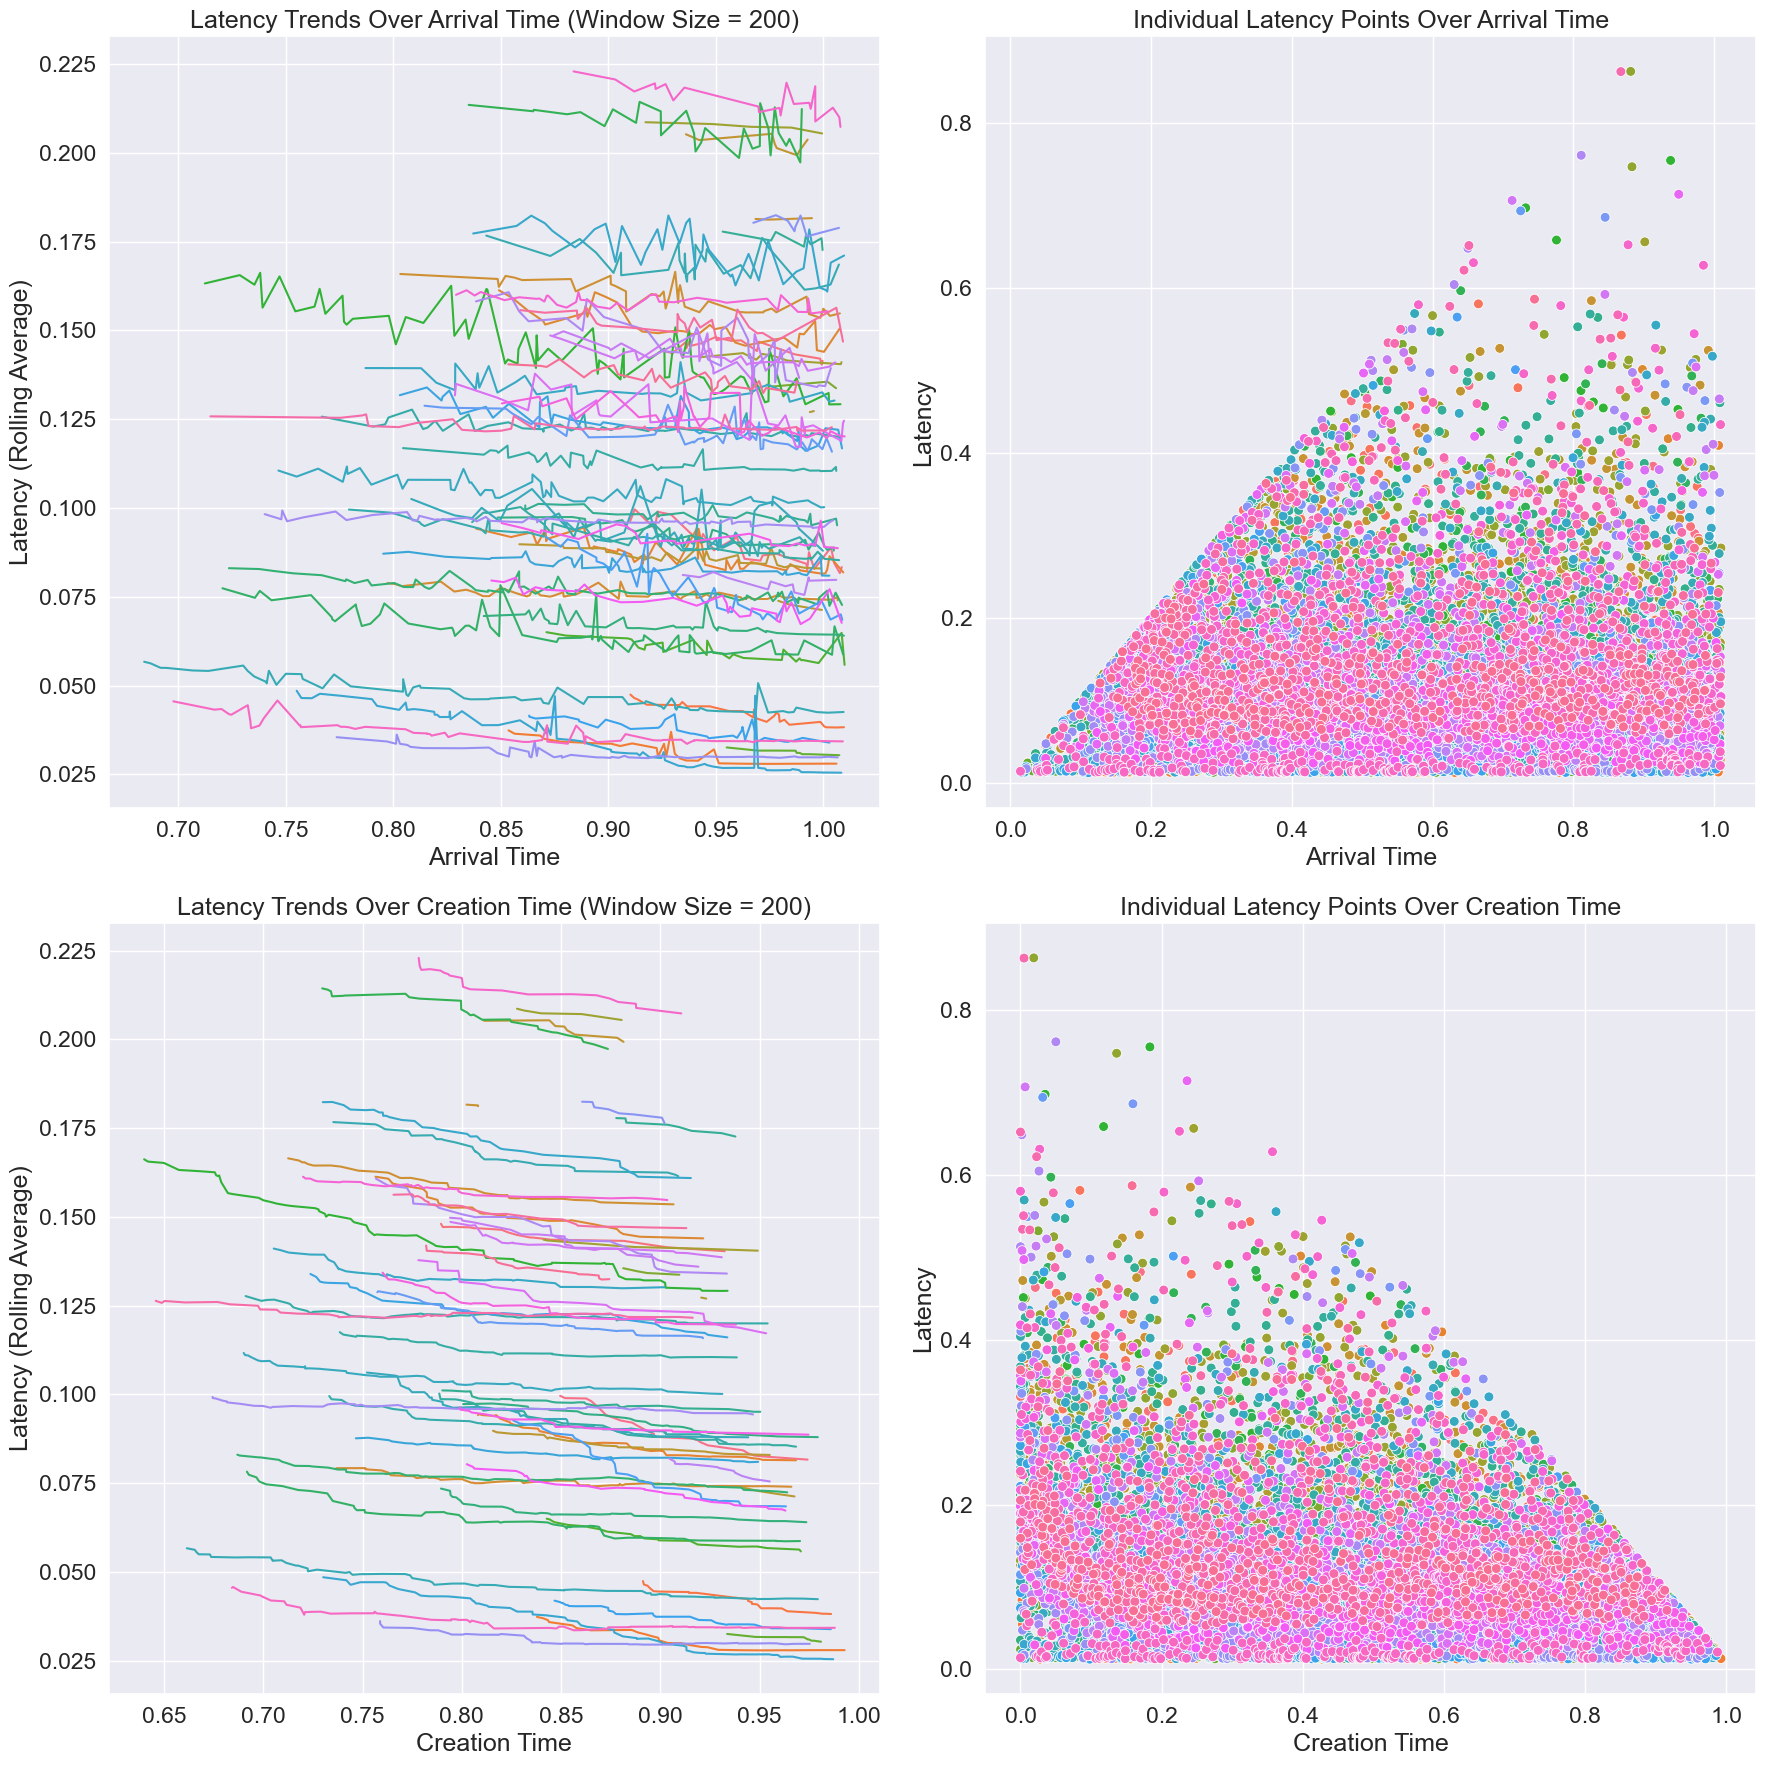

Unnamed: 0  Creation Time   Latency  Arrival Time  \
0            1184       0.000000  0.199398      0.199398   
1              88       0.004794  0.084033      0.088827   
2            1484       0.004870  0.208276      0.213146   
3            5384       0.007579  0.409751      0.417331   
4            6693       0.021016  0.463210      0.484227   
...           ...            ...       ...           ...   
16276       15636       0.863533  0.109866      0.973399   
16277       15528       0.868989  0.097978      0.966967   
16278       15203       0.869162  0.079172      0.948333   
16279       15608       0.870398  0.101622      0.972020   
16280       15887       0.874334  0.112198      0.986531   

                                     Source  \
0                          Aalborg, Denmark   
1                          Aalborg, Denmark   
2                          Aalborg, Denmark   
3                          Aalborg, Denmark   
4                          Aalborg, Denmark   
...                                     ...   
16276  Tolhuin, Argentina (partner station)   
16277  Tolhuin, Argentina (partner station)   
16278  Tolhuin, Argentina (partner station)   
16279  Tolhuin, Argentina (partner station)   
16280  Tolhuin, Argentina (partner station)   

                              Destination Block ID  Block Index  
0      Bangalore, India (partner station)    2_8_0            0  
1      Bangalore, India (partner station)    2_8_1            1  
2      Bangalore, India (partner station)    2_8_2            2  
3      Bangalore, India (partner station)    2_8_3            3  
4      Bangalore, India (partner station)    2_8_4            4  
...                                   ...      ...          ...  
16276                     Nuuk, Greenland  4_7_223          223  
16277                     Nuuk, Greenland  4_7_225          225  
16278                     Nuuk, Greenland  4_7_226          226  
16279                     Nuuk, Greenland  4_7_227          227  
16280                     Nuuk, Greenland  4_7_229          229  

[16281 rows x 8 columns]

In [9]:
# Read the newly uploaded CSV file into a raw DataFrame
source = './allLatencies_9_gateways2'
df_raw = pd.read_csv(source + '.csv')

# remove aalborg
# df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the data block index from the Block ID in the raw DataFrame
df_raw['Block Index'] = df_raw['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200, source=source)

df_raw

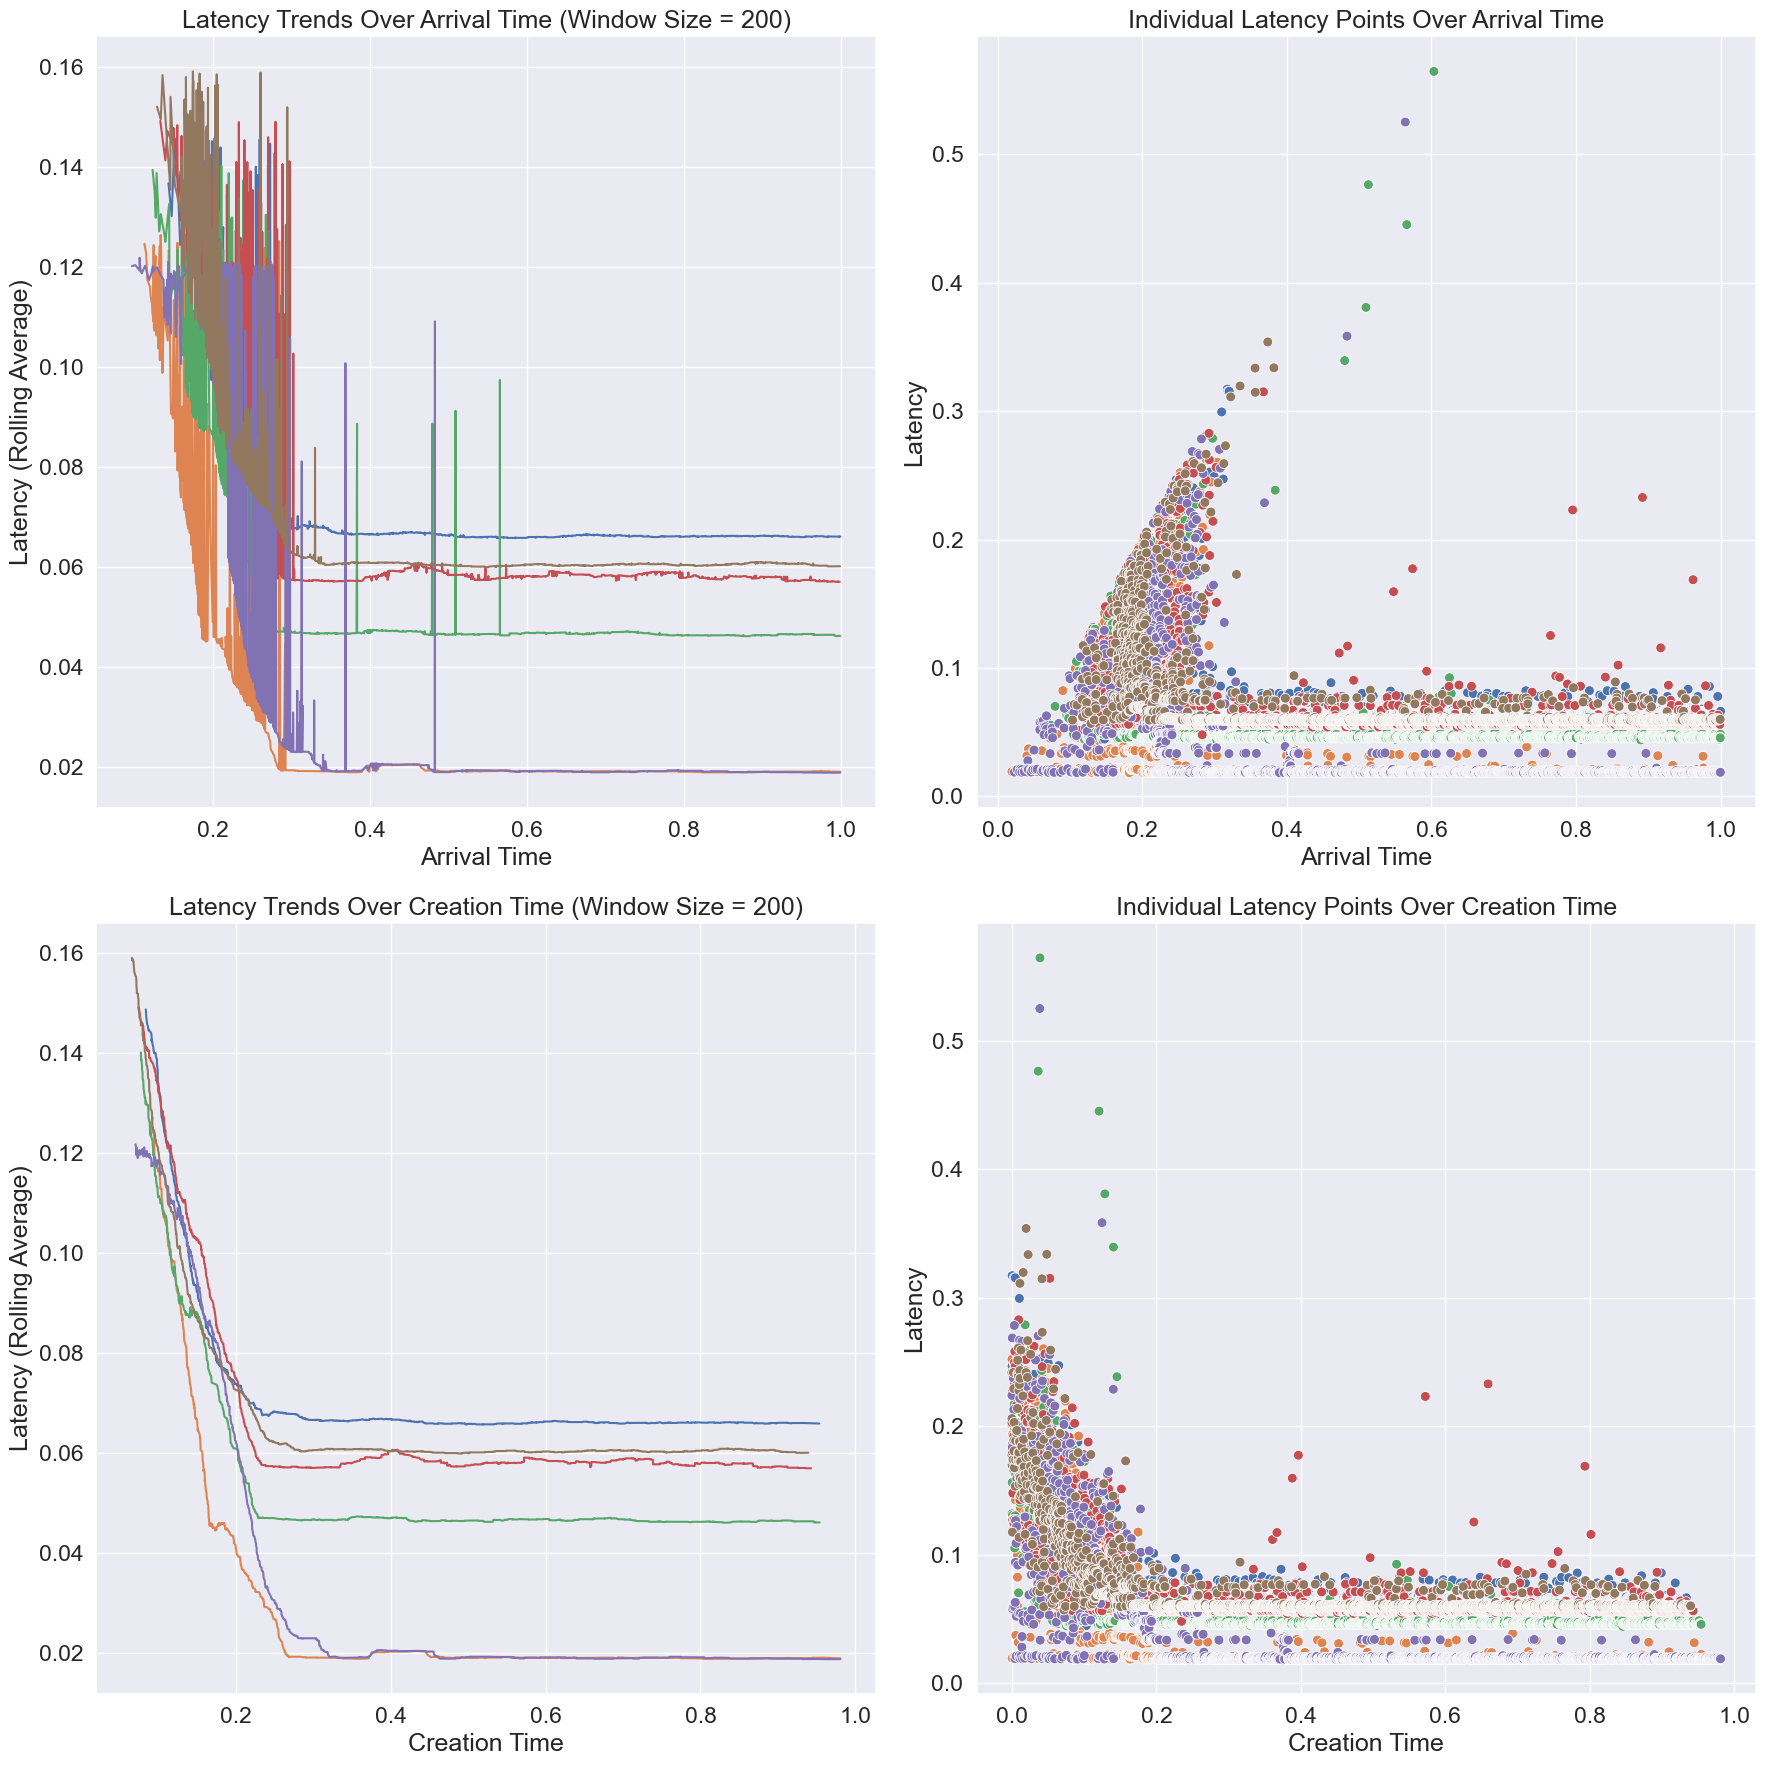

Unnamed: 0  Creation Time   Latency  Arrival Time            Source  \
0             874       0.000000  0.177714      0.177714  Aalborg, Denmark   
1             327       0.000039  0.131593      0.131633  Aalborg, Denmark   
2            2822       0.000212  0.246629      0.246841  Aalborg, Denmark   
3            1501       0.000305  0.203983      0.204288  Aalborg, Denmark   
4            4264       0.000316  0.317122      0.317438  Aalborg, Denmark   
...           ...            ...       ...           ...               ...   
14891       14860       0.936967  0.060558      0.997524     Malaga, Spain   
14892       14864       0.938216  0.059417      0.997634     Malaga, Spain   
14893       14873       0.938247  0.059958      0.998205     Malaga, Spain   
14894       14878       0.938897  0.059779      0.998676     Malaga, Spain   
14895       14889       0.939368  0.060002      0.999370     Malaga, Spain   

                       Destination  Block ID  Block Index  
0      Los Angeles, California, US     2_1_0            0  
1      Los Angeles, California, US     2_1_1            1  
2      Los Angeles, California, US     2_1_2            2  
3      Los Angeles, California, US     2_1_3            3  
4      Los Angeles, California, US     2_1_4            4  
...                            ...       ...          ...  
14891  Los Angeles, California, US  0_1_2563         2563  
14892  Los Angeles, California, US  0_1_2564         2564  
14893  Los Angeles, California, US  0_1_2565         2565  
14894  Los Angeles, California, US  0_1_2566         2566  
14895  Los Angeles, California, US  0_1_2567         2567  

[14896 rows x 8 columns]

In [16]:
# Read the newly uploaded CSV file into a raw DataFrame
source  = './allLatencies_3_gateways'
df_raw2 = pd.read_csv(source + '.csv')

# remove aalborg
# df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the data block index from the Block ID in the raw DataFrame
df_raw2['Block Index'] = df_raw2['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw2.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200, source=source)

df_raw2

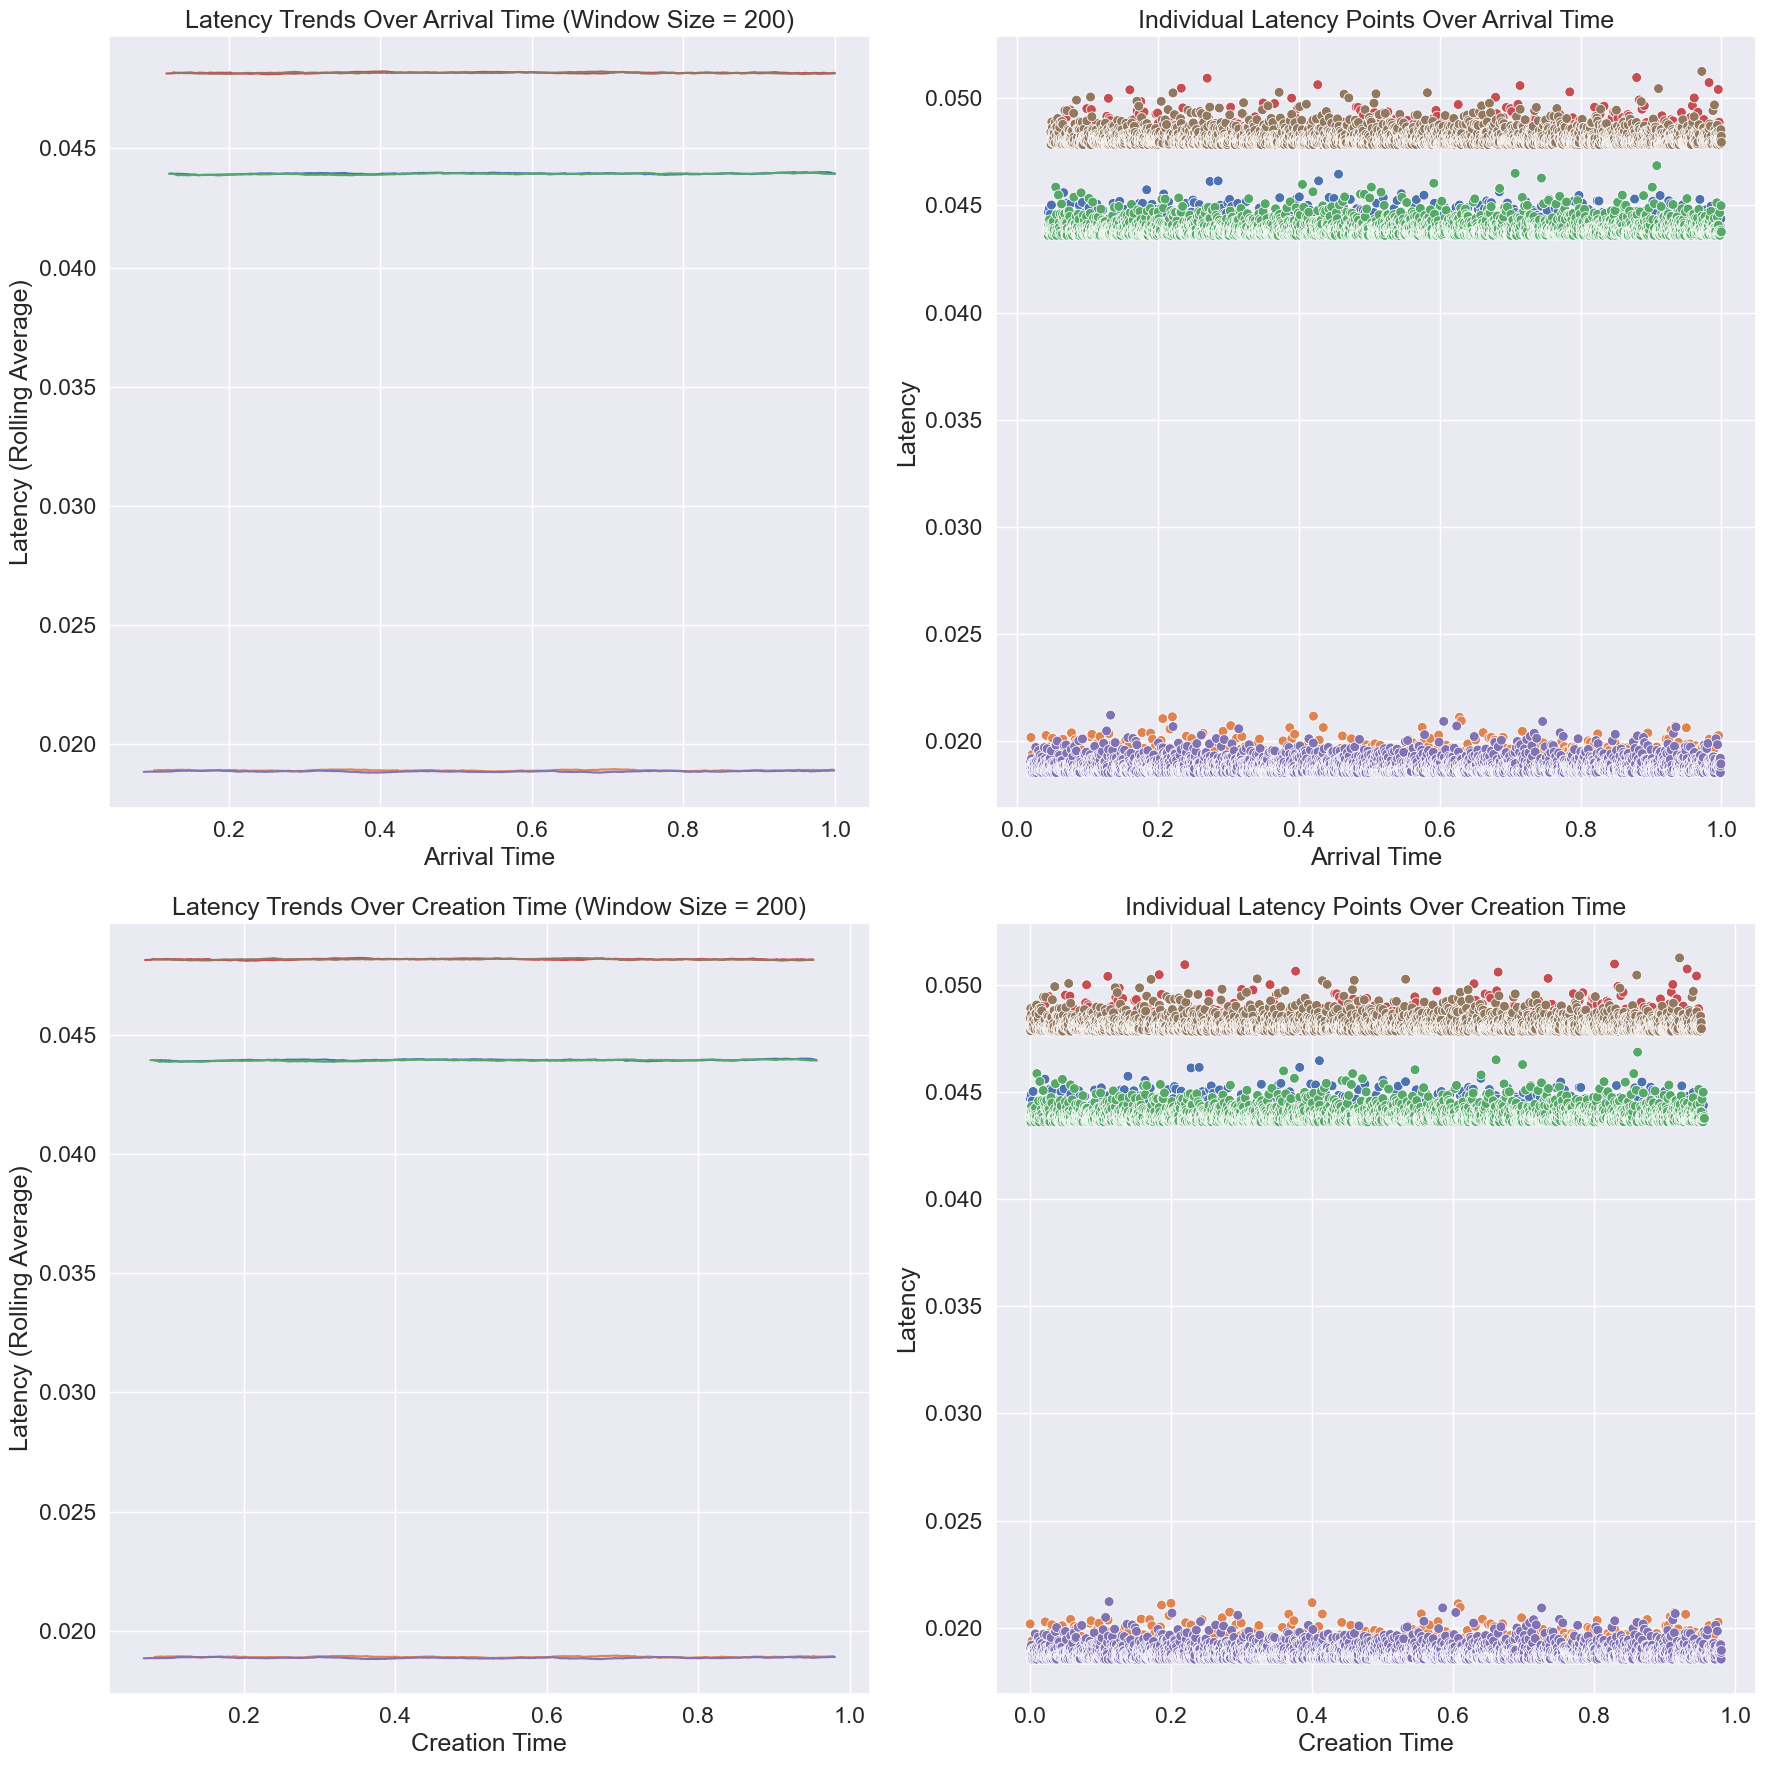

Unnamed: 0  Creation Time   Latency  Arrival Time            Source  \
0             146       0.000000  0.044700      0.044700  Aalborg, Denmark   
1             148       0.001177  0.043659      0.044836  Aalborg, Denmark   
2             151       0.001313  0.043726      0.045038  Aalborg, Denmark   
3             158       0.001515  0.044850      0.046365  Aalborg, Denmark   
4             161       0.002841  0.043779      0.046620  Aalborg, Denmark   
...           ...            ...       ...           ...               ...   
14941       14933       0.950740  0.048524      0.999264     Malaga, Spain   
14942       14935       0.951439  0.047898      0.999337     Malaga, Spain   
14943       14942       0.951578  0.048223      0.999800     Malaga, Spain   
14944       14943       0.951990  0.047883      0.999873     Malaga, Spain   
14945       14945       0.952006  0.047940      0.999946     Malaga, Spain   

                       Destination  Block ID  Block Index  
0      Los Angeles, California, US     2_1_0            0  
1      Los Angeles, California, US     2_1_1            1  
2      Los Angeles, California, US     2_1_2            2  
3      Los Angeles, California, US     2_1_3            3  
4      Los Angeles, California, US     2_1_4            4  
...                            ...       ...          ...  
14941  Los Angeles, California, US  0_1_2501         2501  
14942  Los Angeles, California, US  0_1_2502         2502  
14943  Los Angeles, California, US  0_1_2503         2503  
14944  Los Angeles, California, US  0_1_2504         2504  
14945  Los Angeles, California, US  0_1_2505         2505  

[14946 rows x 8 columns]

In [17]:
# Read the newly uploaded CSV file into a raw DataFrame
source  = './allLatencies_3_gatewaysDR'
df_raw2 = pd.read_csv(source + '.csv')

# remove aalborg
# df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the data block index from the Block ID in the raw DataFrame
df_raw2['Block Index'] = df_raw2['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted_by_paths_raw = df_raw2.sort_values(by=['Source', 'Destination', 'Block Index'])

# Test the updated function on the raw DataFrame with a window size of 20
create_latency_plots(df_sorted_by_paths_raw, window_size=200, source=source)

df_raw2

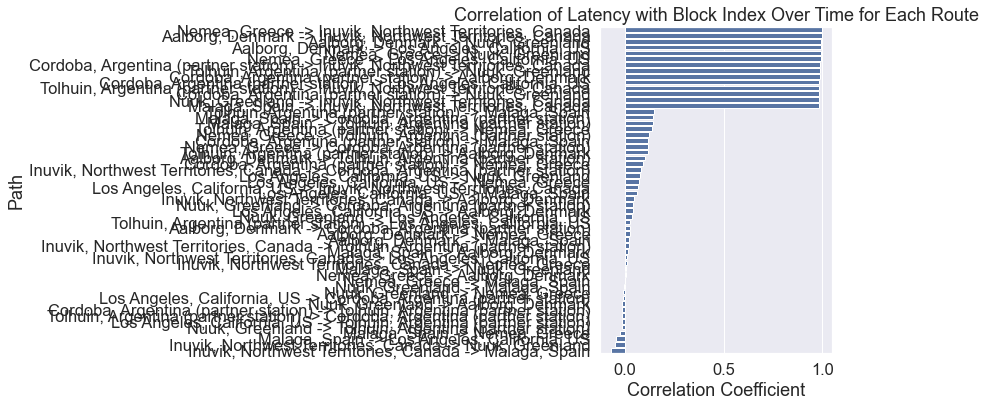

Unnamed: 0  Creation Time   Latency  Arrival Time  \
0             2037       0.000000  0.055835      0.055835   
1             2099       0.000049  0.056376      0.056425   
2             2190       0.000597  0.056833      0.057430   
3             2199       0.001584  0.055933      0.057517   
4             2203       0.001626  0.055939      0.057565   
...            ...            ...       ...           ...   
118936      118825       0.876322  0.122711      0.999033   
118937      118879       0.876674  0.122796      0.999470   
118938      118893       0.877164  0.122417      0.999581   
118939      118915       0.877266  0.122495      0.999761   
118940      118935       0.877278  0.122667      0.999945   

                                      Source  \
0                           Aalborg, Denmark   
1                           Aalborg, Denmark   
2                           Aalborg, Denmark   
3                           Aalborg, Denmark   
4                           Aalborg, Denmark   
...                                      ...   
118936  Tolhuin, Argentina (partner station)   
118937  Tolhuin, Argentina (partner station)   
118938  Tolhuin, Argentina (partner station)   
118939  Tolhuin, Argentina (partner station)   
118940  Tolhuin, Argentina (partner station)   

                                 Destination  Block ID  Block Index  
0       Cordoba, Argentina (partner station)     2_3_0            0  
1       Cordoba, Argentina (partner station)     2_3_1            1  
2       Cordoba, Argentina (partner station)     2_3_2            2  
3       Cordoba, Argentina (partner station)     2_3_3            3  
4       Cordoba, Argentina (partner station)     2_3_4            4  
...                                      ...       ...          ...  
118936                       Nuuk, Greenland  4_7_2376         2376  
118937                       Nuuk, Greenland  4_7_2377         2377  
118938                       Nuuk, Greenland  4_7_2378         2378  
118939                       Nuuk, Greenland  4_7_2379         2379  
118940                       Nuuk, Greenland  4_7_2380         2380  

[118941 rows x 8 columns]

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def extract_block_index(block_id):
    return int(block_id.split('_')[-1])

def create_correlation_plot(df, metric='Creation Time'):
    sns.set(font_scale=1.5)
    df['Path'] = df['Source'].astype(str) + ' -> ' + df['Destination'].astype(str)
    
    # Calculate the correlation of 'Latency' with the chosen metric for each path
    path_correlations = df.groupby('Path').apply(lambda x: x['Latency'].corr(x[metric]))
    
    # Create a new DataFrame for plotting
    correlation_df = path_correlations.reset_index(name='Correlation')
    
    # Create a bar plot to visualize the correlation for each path
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Correlation', y='Path', data=correlation_df.sort_values('Correlation', ascending=False))
    plt.title(f'Correlation of Latency with {metric} Over Time for Each Route')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Path')
    plt.tight_layout()
    plt.show()
    sns.set(font_scale=1.0)

# Read the CSV file into a DataFrame
source = './allLatencies_8_gatewaysSR'
df_raw = pd.read_csv(source + '.csv')

# Optionally remove a location, if required
# df_raw = df_raw[(df_raw['Source'] != 'Aalborg, Denmark') & (df_raw['Destination'] != 'Aalborg, Denmark')]

# Extract the block index from the Block ID
df_raw['Block Index'] = df_raw['Block ID'].apply(extract_block_index)

# Sort the DataFrame by paths (Source and Destination)
df_sorted = df_raw.sort_values(by=['Source', 'Destination', 'Block Index'])

# Call the function to create the latency plots
# create_latency_plots(df_sorted, window_size=200)

# Call the function to create the correlation plot
create_correlation_plot(df_sorted, metric='Block Index')

# Display the raw DataFrame
df_raw


In [7]:
!dir

 El volumen de la unidad T es DATOS
 El n�mero de serie del volumen es: 6648-9550

 Directorio de t:\Fede\SatNEx_code\tests

17/10/2023  10:17    <DIR>          .
17/10/2023  10:17    <DIR>          ..
09/10/2023  17:39             5.684 allLatencies_2gateways.csv
13/10/2023  03:59         1.806.350 allLatencies_3_gateways.csv
17/10/2023  10:19            15.309 becaria.ipynb
10/10/2023  14:41               124 logfile.log
               4 archivos      1.827.467 bytes
               2 dirs  168.024.330.240 bytes libres
